# 1. Exploratory Data Analysis (EDA) on JHU CSSE COVID-19 Confirmed Cases
#    Dataset file: time_series_covid19_confirmed_global.csv

## Imports and Settings ---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load and Preview Data ---

In [ ]:
DATA_URL = ("time_series_covid19_confirmed_global.csv")
df_cum = pd.read_csv(DATA_URL)
print("Dataset shape:", df_cum.shape)
print(df_cum.head())

Dataset shape: (289, 1147)
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0

## Reshape & Compute Daily New Cases ---

In [ ]:
date_cols = df_cum.columns[4:]

df_long = df_cum.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    value_vars=date_cols,
    var_name="Date",
    value_name="CumConfirmed"
)
# Parse dates and sort
df_long["Date"] = pd.to_datetime(df_long["Date"], format="%m/%d/%y")
df_long = df_long.sort_values(["Country/Region", "Province/State", "Date"])

# Compute daily new cases per region
df_long["NewConfirmed"] = (
    df_long.groupby(["Country/Region", "Province/State"])["CumConfirmed"]
    .diff().fillna(0)
)

## Descriptive Statistics ---
## Focus on daily new cases across all regions

In [ ]:
new_cases = df_long["NewConfirmed"]
print("Descriptive Statistics (New Cases):")
print(new_cases.describe())

median_val = new_cases.median()
mode_val   = new_cases.mode().iloc[0]
skewness   = new_cases.skew()
print(f"Median: {median_val:.2f}, Mode: {mode_val:.2f}, Skewness: {skewness:.2f}")


Descriptive Statistics (New Cases):
count    330327.000000
mean         68.321518
std         941.108997
min      -53304.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       92264.000000
Name: NewConfirmed, dtype: float64
Median: 0.00, Mode: 0.00, Skewness: 32.01


## Distribution Visualizations ---
## Histogram + KDE of daily new cases

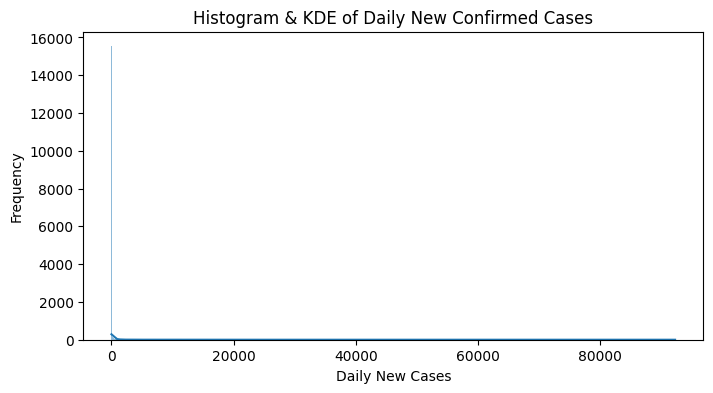

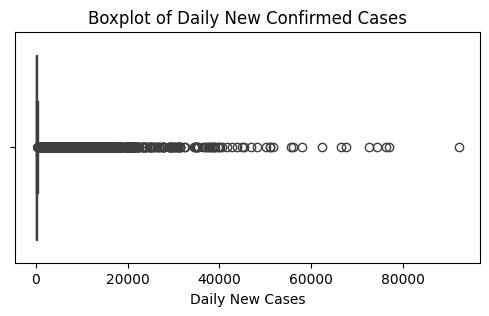

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(new_cases[new_cases > 0], kde=True, edgecolor='w')
plt.title("Histogram & KDE of Daily New Confirmed Cases")
plt.xlabel("Daily New Cases")
plt.ylabel("Frequency")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x=new_cases[new_cases > 0])
plt.title("Boxplot of Daily New Confirmed Cases")
plt.xlabel("Daily New Cases")
plt.show()

## Temporal Trend ---
## Aggregate global daily new cases

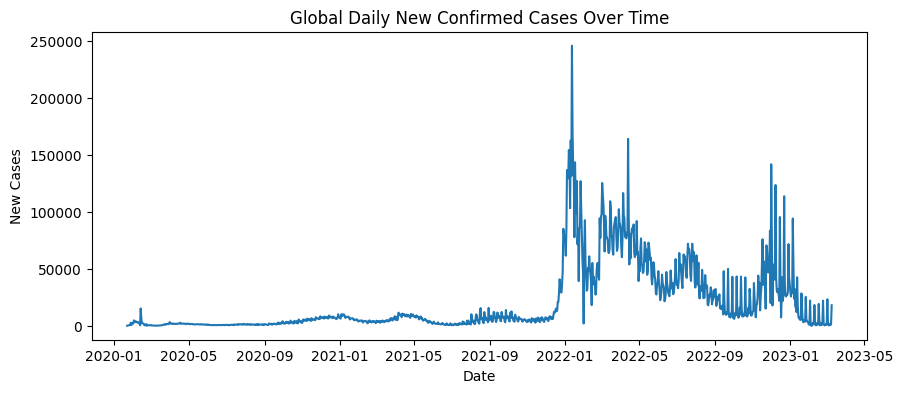

In [ ]:
global_daily = df_long.groupby("Date")["NewConfirmed"].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.lineplot(data=global_daily, x="Date", y="NewConfirmed")
plt.title("Global Daily New Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()

## Correlation Analysis ---
## Correlate latitude, longitude, and NewConfirmed
## Sample a subset to reduce compute time

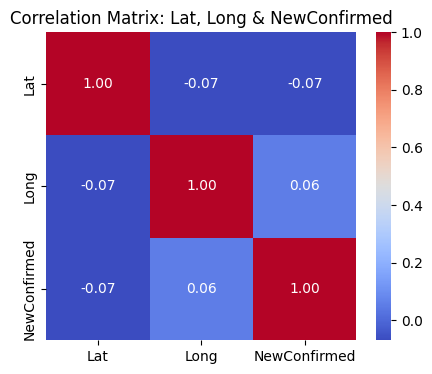

In [ ]:
sample = df_long.sample(n=50000, random_state=1)[["Lat", "Long", "NewConfirmed"]]
corr = sample.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix: Lat, Long & NewConfirmed")
plt.show()

## Pair Plot ---

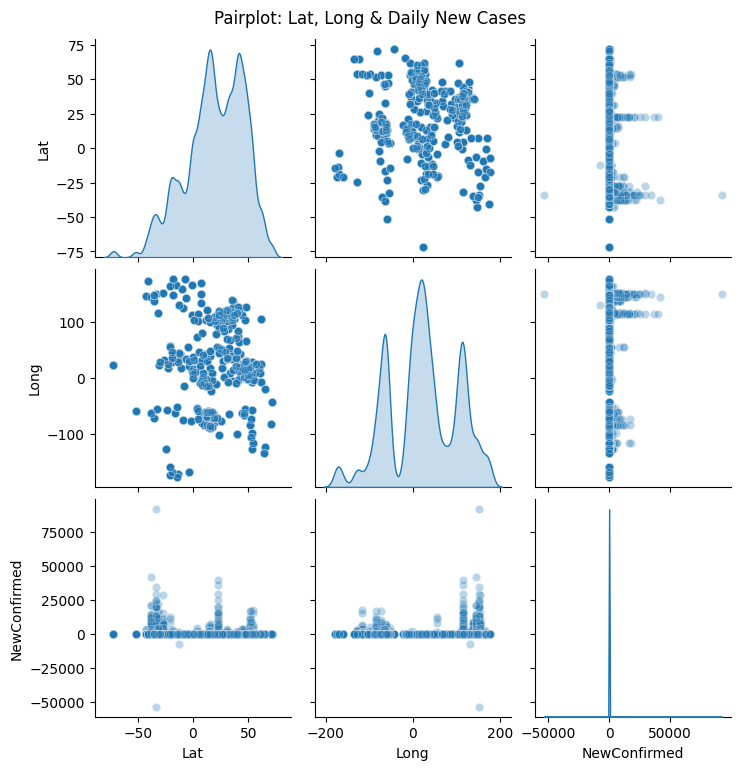

In [ ]:
sns.pairplot(sample, diag_kind="kde", plot_kws={"alpha": 0.3})
plt.suptitle("Pairplot: Lat, Long & Daily New Cases", y=1.02)
plt.show()

## Scatter Plot Example ---
## Example: New cases vs. latitude

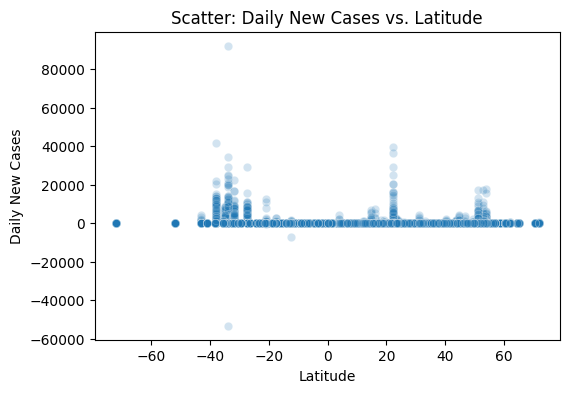

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=sample["Lat"], y=sample["NewConfirmed"], alpha=0.2)
plt.title("Scatter: Daily New Cases vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Daily New Cases")
plt.show()